<a href="https://colab.research.google.com/github/UmaViraja/PDS/blob/main/Assignment3_16372946.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [39]:
df = pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [40]:
df.shape

(768, 9)

In [41]:
df.dtypes

,0
Pregnancies,int64
Glucose,int64
BloodPressure,int64
SkinThickness,int64
Insulin,int64
BMI,float64
DiabetesPedigreeFunction,float64
Age,int64
Outcome,int64


In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [43]:
print(df.isnull().sum())

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


(a) set a seed (to ensure work reproducibility) and take a random sample of 25 observations and find the mean Glucose and highest Glucose values of this sample and compare these statistics with the population statistics of the same variable. You should use charts for this comparison.

In [44]:
np.random.seed(25)
sample_df = df.sample(n=25)

In [45]:
sample_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
459,9,134,74,33,60,25.9,0.460,81,0
39,4,111,72,47,207,37.1,1.390,56,1
344,8,95,72,0,0,36.8,0.485,57,0
84,5,137,108,0,0,48.8,0.227,37,1
700,2,122,76,27,200,35.9,0.483,26,0


In [46]:
sample_mean_glucose = sample_df['Glucose'].mean()
sample_max_glucose = sample_df['Glucose'].max()

population_mean_glucose = df['Glucose'].mean()
population_max_glucose = df['Glucose'].max()


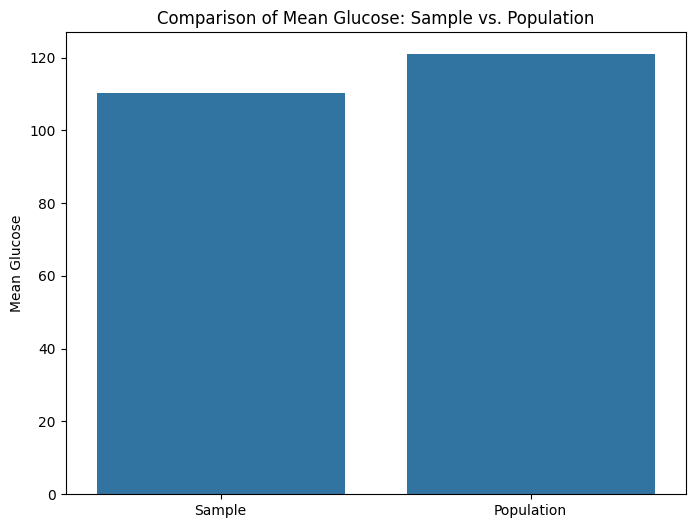

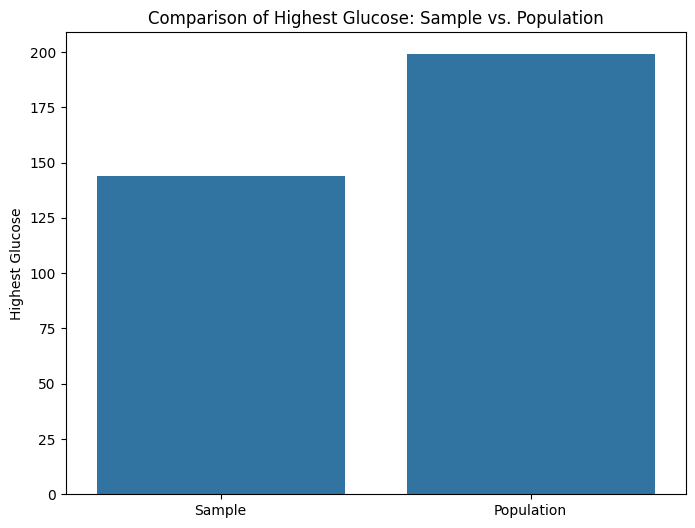

In [47]:
plt.figure(figsize=(8, 6))
sns.barplot(x=['Sample', 'Population'], y=[sample_mean_glucose, population_mean_glucose])
plt.title('Comparison of Mean Glucose: Sample vs. Population')
plt.ylabel('Mean Glucose')
plt.show()

plt.figure(figsize=(8, 6))
sns.barplot(x=['Sample', 'Population'], y=[sample_max_glucose, population_max_glucose])
plt.title('Comparison of Highest Glucose: Sample vs. Population')
plt.ylabel('Highest Glucose')
plt.show()

b) Find the 98th percentile of BMI of your sample and the population and compare the results using charts.

In [48]:
sample_bmi_98th_percentile = np.percentile(sample_df['BMI'], 98)
population_bmi_98th_percentile = np.percentile(df['BMI'], 98)


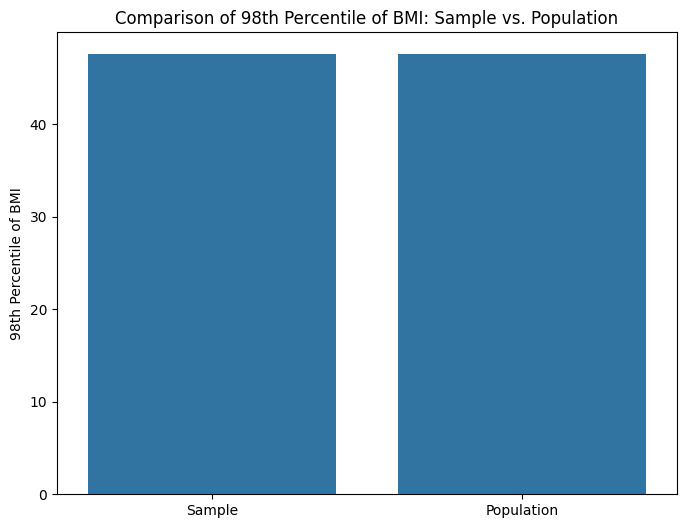

In [49]:
plt.figure(figsize=(8, 6))
sns.barplot(x=['Sample', 'Population'], y=[sample_bmi_98th_percentile, population_bmi_98th_percentile])
plt.title('Comparison of 98th Percentile of BMI: Sample vs. Population')
plt.ylabel('98th Percentile of BMI')
plt.show()

(c) Using bootstrap (replace= True), create 500 samples (of 150 observation each) from the population and find the average mean, standard deviation and percentile for BloodPressure and compare this with these statistics from the population for the same variable. Again, you should create charts for this comparison. Report on your findings.

In [50]:
#Bootstrap
num_samples = 500
sample_size = 150
bootstrap_means = []
bootstrap_stds = []
bootstrap_percentiles = []

In [51]:
for _ in range(num_samples):
    bootstrap_sample = df['BloodPressure'].sample(sample_size, replace=True)
    bootstrap_means.append(bootstrap_sample.mean())
    bootstrap_stds.append(bootstrap_sample.std())
    bootstrap_percentiles.append(np.percentile(bootstrap_sample, 98))

In [52]:
population_mean = df['BloodPressure'].mean()
population_std = df['BloodPressure'].std()
population_percentile = np.percentile(df['BloodPressure'], 98)

avg_bootstrap_mean = np.mean(bootstrap_means)
avg_bootstrap_std = np.mean(bootstrap_stds)
avg_bootstrap_percentile = np.mean(bootstrap_percentiles)

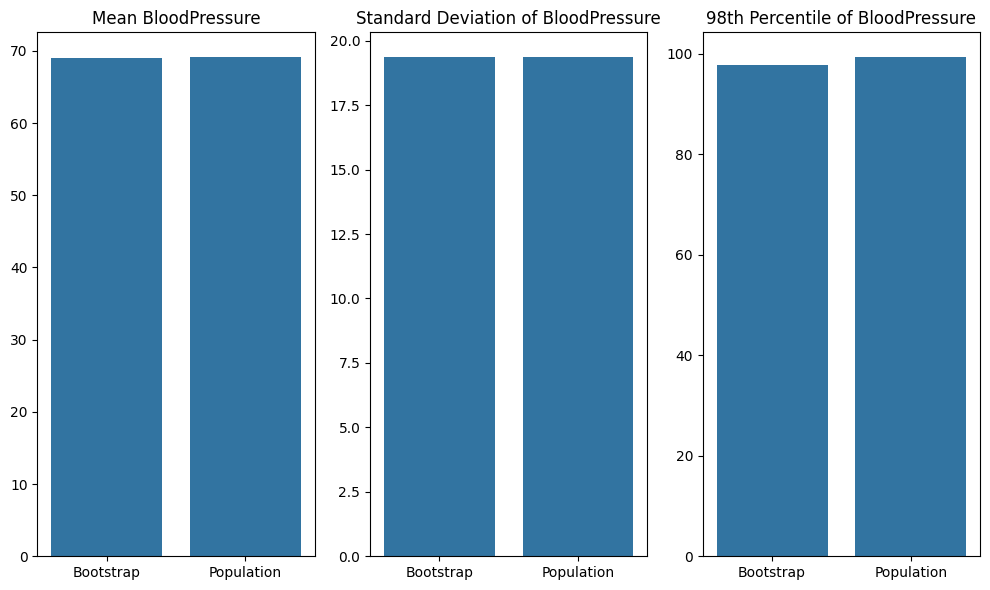

In [53]:
plt.figure(figsize=(10, 6))

plt.subplot(1, 3, 1)
sns.barplot(x=['Bootstrap', 'Population'], y=[avg_bootstrap_mean, population_mean])
plt.title('Mean BloodPressure')

plt.subplot(1, 3, 2)
sns.barplot(x=['Bootstrap', 'Population'], y=[avg_bootstrap_std, population_std])
plt.title('Standard Deviation of BloodPressure')

plt.subplot(1, 3, 3)
sns.barplot(x=['Bootstrap', 'Population'], y=[avg_bootstrap_percentile, population_percentile])
plt.title('98th Percentile of BloodPressure')

plt.tight_layout()
plt.show()